<a href="https://colab.research.google.com/github/karlacuv/MCD_Procesamiento/blob/main/Tarea2_AnalisisSentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de Sentimientos
### Karla Cureño Vega - 2085376

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
## Leer datos
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Files/MCD/Procesamiento y Clasificación de Datos/Semana 2 - Análisis de Sentimientos/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
df.shape

(50000, 2)

In [39]:
N = 49000
df = df.iloc[:-N , :]
df.shape

(1000, 2)

In [88]:
counts = df.sentiment.value_counts()
counts

positive    501
negative    499
Name: sentiment, dtype: int64

In [40]:
##Limpieza de Texto
import re
# Función para limpiar texto
def clean(text):
    #Minisculas
    text=text.lower() 
    #Remoción de HTML (cosas entre <>)
    text= re.sub('<[^>]*>', '', text)
    # Remover caractares no alfabeticos
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Aplicando la función a las reviews
df['Cleaned Reviews'] = df['review'].apply(clean)
df.head()

,review,sentiment,Cleaned Reviews
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}


def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))  
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,sentiment,Cleaned Reviews,POS tagged
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[(one, None), (reviewers, n), (mentioned, v), ..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[(wonderful, a), (little, a), (production, n),..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[(thought, v), (wonderful, a), (way, n), (spen..."
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[(basically, r), (family, n), (little, a), (bo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[(petter, n), (mattei, n), (love, n), (time, n..."


In [42]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,review,sentiment,Cleaned Reviews,POS tagged,Lemma
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[(one, None), (reviewers, n), (mentioned, v), ...",one reviewer mention watch oz episode hook r...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[(wonderful, a), (little, a), (production, n),...",wonderful little production filming techniqu...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[(thought, v), (wonderful, a), (way, n), (spen...",think wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[(basically, r), (family, n), (little, a), (bo...",basically family little boy jake think zombi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[(petter, n), (mattei, n), (love, n), (time, n...",petter mattei love time money visually stunn...


### Análisis de Sentimiento usando TextBlob

In [53]:
from textblob import TextBlob

# Cálculo de Subjetividad
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# Cálculo de Polaridad
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# Función para analizar reviews
def analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [73]:
df_final=pd.DataFrame(df[['review', 'Lemma', 'sentiment']])
df_final.head()


,review,Lemma,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming techniqu...,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,positive


In [74]:
df_final['Polarity'] = df_final['Lemma'].apply(getPolarity) 
df_final['Analysis'] = df_final['Polarity'].apply(analysis)
df_final.head()

,review,Lemma,sentiment,Polarity,Analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,positive,0.038498,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming techniqu...,positive,0.125980,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer we...,positive,0.381513,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,negative,-0.004167,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,positive,0.239534,positive


In [75]:
tb_counts = df_final.Analysis.value_counts()
tb_counts

positive    714
negative    286
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdecc65efd0>,
 [Text(-0.6850665224379854, 0.8606299203692174, 'positive'),
  Text(0.6850665224379854, -0.8606299203692175, 'negative')],
 [Text(-0.3736726486025374, 0.46943450201957304, '71.4%'),
  Text(0.3736726486025374, -0.4694345020195731, '28.6%')])

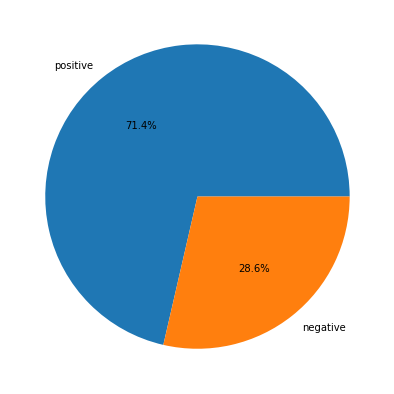

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= df_final.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0), autopct='%1.1f%%', shadow=False)

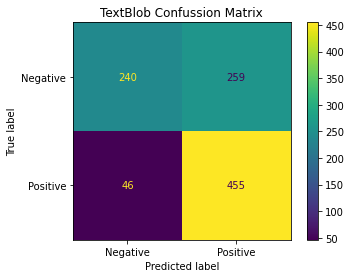

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_tb=confusion_matrix(df_final['sentiment'], df_final['Analysis'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tb, display_labels=['Negative', 'Positive']);
disp.plot()
plt.title("TextBlob Confussion Matrix")
plt.show()

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy Textblob: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['Analysis'])*100))

Accuracy Textblob: 69.50%


### Análisis de Sentimiento usando VADER

In [72]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.4 MB/s 


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Cálculo de VaderSentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df_final['Vader Sentiment'] = df_final['Lemma'].apply(vadersentimentanalysis)

In [81]:
# Función para Analizar VaderSentiment
def vader_analysis(compound):
    if compound >= 0.5:
        return 'positive'
    elif compound <= -0.5 :
        return 'negative'
    else:
        return 'neutral'
    
df_final['Vader Analysis'] = df_final['Vader Sentiment'].apply(vader_analysis)
df_final.head()

,review,Lemma,sentiment,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,positive,0.038498,positive,-0.9916,negative
1,A wonderful little production. <br /><br />The...,wonderful little production filming techniqu...,positive,0.125980,positive,0.9601,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer we...,positive,0.381513,positive,0.9647,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,negative,-0.004167,negative,-0.8805,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,positive,0.239534,positive,0.9887,positive


In [82]:
vader_counts = df_final['Vader Analysis'].value_counts()
vader_counts

positive    606
negative    264
neutral     130
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdecc2bb250>,
 [Text(-0.3922656576713352, 1.1340756825766414, 'positive'),
  Text(-0.082859448288293, -1.096874793141569, 'negative'),
  Text(1.009530094796705, -0.43686266457521394, 'neutral')],
 [Text(-0.2288216336416122, 0.6615441481697073, '60.6%'),
  Text(-0.04519606270270527, -0.598295341713583, '26.4%'),
  Text(0.5506527789800209, -0.23828872613193486, '13.0%')])

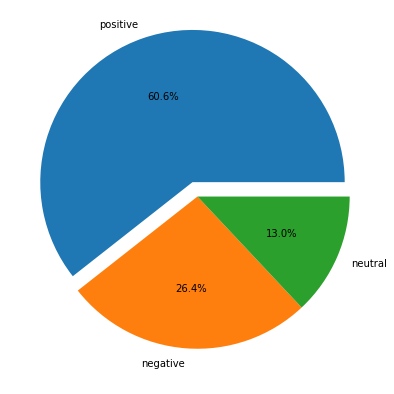

In [83]:
vader_counts= df_final['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

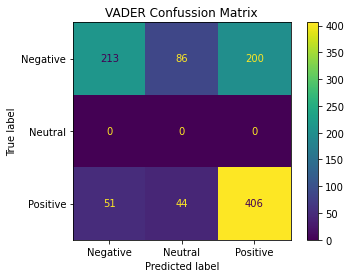

In [115]:
classes=['Negative', 'Neutral','Positive']
cm_vader=confusion_matrix(df_final['sentiment'], df_final['Vader Analysis'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vader, display_labels=classes);
disp.plot()
plt.title("VADER Confussion Matrix")
plt.show()

In [89]:
print('Accuracy VADER: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['Vader Analysis'])*100))

Accuracy VADER: 61.90%


### Análisis usando SentiWordNet

In [90]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "positive"
    if sentiment==0:
        return "neutral"
    else:
        return "negative"

df_final['SWN analysis'] = df['POS tagged'].apply(sentiwordnetanalysis)
df_final.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,review,Lemma,sentiment,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,One of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hook r...,positive,0.038498,positive,-0.9916,negative,negative
1,A wonderful little production. <br /><br />The...,wonderful little production filming techniqu...,positive,0.125980,positive,0.9601,positive,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer we...,positive,0.381513,positive,0.9647,positive,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombi...,negative,-0.004167,negative,-0.8805,negative,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunn...,positive,0.239534,positive,0.9887,positive,positive


In [91]:
swn_counts= df_final['SWN analysis'].value_counts()
swn_counts

positive    679
negative    310
neutral      11
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdec149a950>,
 [Text(-0.6398060087586837, 1.0152084865466224, 'positive'),
  Text(0.5539856484997069, -0.9503156850522669, 'negative'),
  Text(1.0993432485351025, -0.03800555091414925, 'neutral')],
 [Text(-0.3732201717758987, 0.5922049504855297, '67.9%'),
  Text(0.30217399009074913, -0.5183540100285091, '31.0%'),
  Text(0.5996417719282376, -0.02073030049862686, '1.1%')])

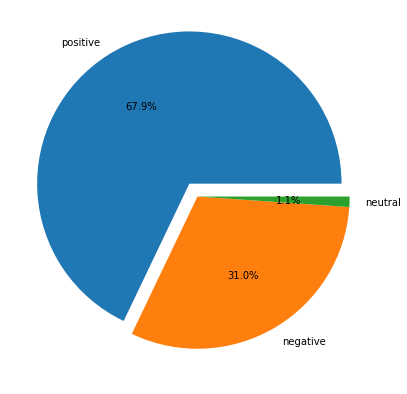

In [92]:
swn_counts= df_final['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

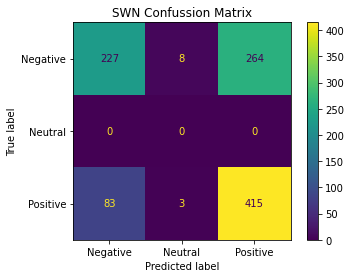

In [114]:
classes=['Negative', 'Neutral','Positive']
cm_swn=confusion_matrix(df_final['sentiment'], df_final['SWN analysis'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_swn, display_labels=classes);
disp.plot()
plt.title("SWN Confussion Matrix")
plt.show()

In [96]:
print('Accuracy SWN: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['SWN analysis'])*100))

Accuracy SWN: 64.20%


## Comparación de resultados

([<matplotlib.patches.Wedge at 0x7fdec111dcd0>,
 [Text(-0.5864888413621266, 0.9306077793344039, 'positive'),
  Text(0.5539856484997069, -0.9503156850522669, 'negative'),
  Text(1.3491939868385348, -0.04664317612191044, 'neutral')],
 [Text(-0.31990300437934177, 0.5076042432733111, '67.9%'),
  Text(0.30217399009074913, -0.5183540100285091, '31.0%'),
  Text(0.84949251023167, -0.02936792570638805, '1.1%')])

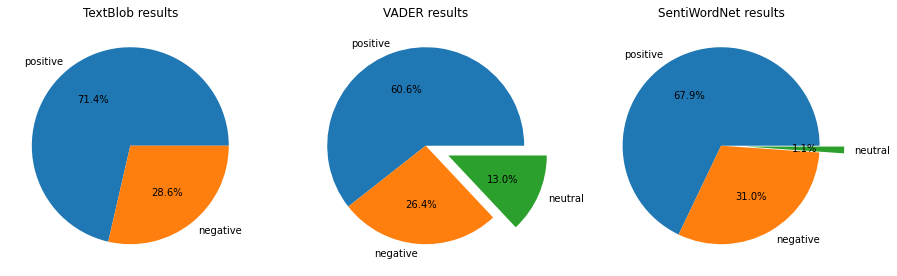

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [113]:
print('Accuracy Textblob: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['Analysis'])*100))
print('Accuracy VADER: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['Vader Analysis'])*100))
print('Accuracy SWN: {:.2f}%'.format(accuracy_score(df_final['sentiment'], df_final['SWN analysis'])*100))

Accuracy Textblob: 69.50%
Accuracy VADER: 61.90%
Accuracy SWN: 64.20%
